In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


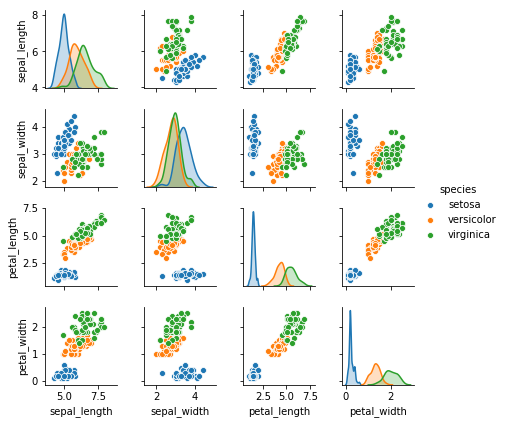

In [2]:
# sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
# y_iris
y_iris.shape

(150,)

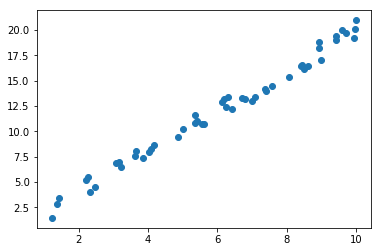

In [5]:
# 有监督学习：简单线性回归
import numpy as np
import matplotlib.pyplot as plt

r = np.random.RandomState(24)
x = 10 * r.rand(50)
y = x * 2 - 1 + r.rand(50) * 2
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, n_jobs=1)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 斜率
model.coef_

array([1.96413556])

In [10]:
# 截距
model.intercept_

0.21179209351434913

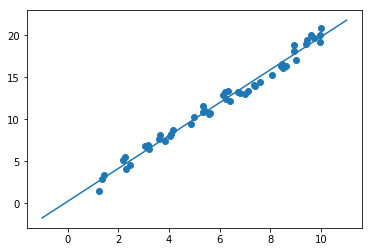

In [11]:
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(Xfit, yfit)

In [12]:
# 有监督学习：鸢尾花数据分类
# 高斯朴素贝叶斯
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                test_size = 0.25,
                                                random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ymodel)

0.9736842105263158

In [15]:
# 无监督学习：鸢尾花数据降维
# PCA: 主成分分析法
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

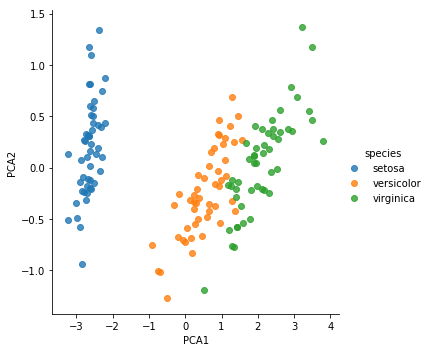

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

In [17]:
# 无监督学习：鸢尾花数据聚类
# GMM：高斯混合模型
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

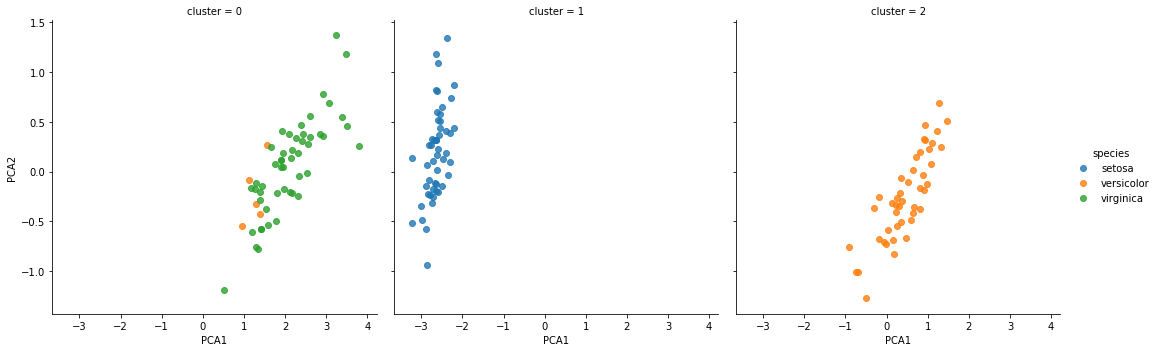

In [18]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species',
          col='cluster', fit_reg=False)

### 应用：手写数字识别

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape # 1797张8*8像素的手写字体图像

(1797, 8, 8)

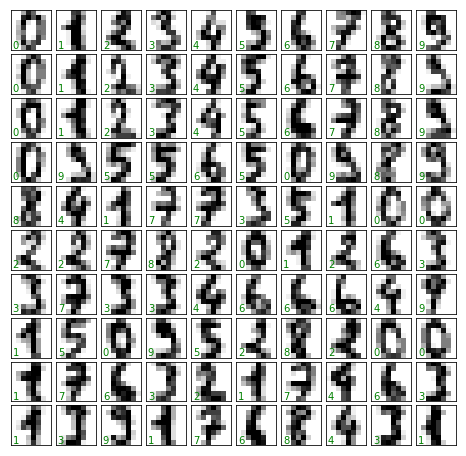

In [20]:
import matplotlib.pyplot as plt

# 加载100张图片可视化
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='g')